##### Import Statements

In [ ]:
import pandas as pd     
import numpy as np    
import sqlite3 as sql
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import math
import squarify as sq
plt.style.use('fivethirtyeight');

---
#### CS 260 Final Project - SP23
---

# Global Terrorism Attacks 

### By: Alexander Giovinazzo, Magdalena Martins, and Christian Morey


---

## 1. Introduction

**NOTE: We pulled this dataset from Kaggle and have no knowledge of how the data was gathered. We are using this dataset under the assumption that we have not overlooked any information and that there is no bias or motive.

Our final assignment investigated terrorist attacks worldwide since 1968. Our project comprises data from terrorist attacks in 175 different countries, with thousands of entries providing us with details of the groups behind the attacks, the number of people injured or killed in the assaults, and other critical information crucial to our research.

We focused on addressing the following questions:

1) Is there a common perpetrator in deadly attacks?

2) How many people have been impacted by terrorist attacks based on the attack type?

3) How frequent are smaller attacks compared to larger attacks?

4) What is the distribution of countries that have experienced terrorist attacks?

5) How many times has there been an attack that affected a significant portion of the home country's population?

6) Does the type of attack have any impact on casualties (deaths/injuries)? Does the type of attack become more deadly over time?


---

## 2. Data

### Input the Data

#### Input the Datasets!

In [ ]:
#In this cell, we load the data.
try:
    #load your csv data from github.
    csv_data = pd.read_csv("https://raw.githubusercontent.com/AlexGiovinazzo/terrorism_dataset/main/global_terrorism.csv")

    #Connect to a database - use a different name for your db than "example"
    conn = sql.connect('global_terrorism.db')

    #Load the csv data into a table using the connection to the db
    #that you just created in the previous line.
    csv_data.to_sql('global_terrorism', conn, index = False)

except ValueError: 
    print("""A ValueError occurred. If you've run this cell twice, 
             then you're likely getting the error because the DB was created the first time
             and Python doesn't want to overwrite it the second time.""")

A ValueError occurred. If you've run this cell twice, 
             then you're likely getting the error because the DB was created the first time
             and Python doesn't want to overwrite it the second time.


In [ ]:
#In this cell, we load the data.
try:
    #load your csv data from github.
    csv_data4 = pd.read_csv("https://raw.githubusercontent.com/AlexGiovinazzo/terrorism_dataset/main/census_populations.csv")
    ## Data was taken from US Census/International Database
    ## URL: https://www.census.gov/data-tools/demo/idb/#/table?COUNTRY_YEAR=2023&COUNTRY_YR_ANIM=2020

    #Connect to a database - use a different name for your db than "example"
    conn = sql.connect('global_terrorism.db')

    #Load the csv data into a table using the connection to the db
    #that you just created in the previous line.
    csv_data4.to_sql('population', conn, index = False)

except ValueError: 
    print("""A ValueError occurred. If you've run this cell twice, 
             then you're likely getting the error because the DB was created the first time
             and Python doesn't want to overwrite it the second time.""")

A ValueError occurred. If you've run this cell twice, 
             then you're likely getting the error because the DB was created the first time
             and Python doesn't want to overwrite it the second time.


#### Take a look at the datasets!

In [ ]:
#Show the rows of the table.
sql_statement = """SELECT * 
                   FROM population"""

results = pd.read_sql_query(sql_statement, conn)
results

,Row,FIPS,GENC,Country,Year,Population,Annual_Growth_Rate%,Area,Density,Total_Fertility_Rate,Life_Expectancy,Under_5_Mortality_Rate
0,1,AF,AF,Afghanistan,2023,39232003,2.262,652230,60.2,4.5280,54.05,151.27
1,2,AL,AL,Albania,2023,3101621,0.190,27398,113.2,1.5459,79.70,12.33
2,3,AG,DZ,Algeria,2023,44758398,1.270,2381740,18.8,2.4662,78.27,22.27
3,4,AQ,AS,American Samoa,2023,44620,-1.737,198,225.4,2.1340,75.58,12.44
4,5,AN,AD,Andorra,2023,85468,-0.111,468,182.6,1.4564,83.61,4.06
...,...,...,...,...,...,...,...,...,...,...,...,...
222,223,WF,WF,Wallis and Futuna,2023,15929,0.232,142,112.2,1.7097,80.89,4.39
223,224,WE,XW,West Bank,2023,3050760,1.662,5640,540.9,2.9080,76.63,17.66
224,225,YM,YE,Yemen,2023,31565602,1.832,527968,59.8,2.9120,67.83,60.51
225,226,ZA,ZM,Zambia,2023,20216029,2.862,743398,27.2,4.4907,66.60,52.31


In [ ]:
#Show the rows of the table.
sql_statement = """SELECT * 
                   FROM global_terrorism"""

results = pd.read_sql_query(sql_statement, conn)
results

,month,day,year,agg_date,country,state,city,subreg,continent,attacker,injured,dead,cause,lat,long,category
0,11,13,2022,11/13/2022,Turkey,Istanbul Province,Istanbul,Western Asia,Asia,Kurdistan Workers' Party (PKK),81.0,6.0,A Syrian female placed a bag next to a bench o...,41.009198,28.966219,Explosion
1,10,29,2022,10/29/2022,Somalia,Banaadir,Mogadishu,Eastern Africa,Africa,Al-Shabaab,300.0,121.0,A double car bombing killed at least 121 peopl...,2.034931,45.341918,Explosion
2,9,5,2022,9/5/2022,Afghanistan,Kabul,None,Southern Asia,Asia,Islamic State - Khorasan Province,20.0,10.0,A suicide bomber approached the Russian embass...,34.526011,69.177684,Explosion
3,8,21,2022,8/21/2022,Somalia,Banaadir,Mogadishu,Eastern Africa,Africa,Al-Shabaab,117.0,21.0,Two car bombs exploded at the Hayat Hotel in M...,2.034931,45.341918,Explosion
4,7,16,2022,7/16/2022,Indonesia,Papua,None,South-Eastern Asia,Asia,West Papua National Liberation Army,2.0,10.0,Around 20 gunmen attacked the village of Nogol...,-4.318185,138.180163,Assault
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27165,2,21,1968,2/21/1968,United States,Washington,None,Northern America,Americas,None,0.0,0.0,The Soviet embassy was bombed in the early mor...,38.895037,-77.036543,Explosion
27166,2,20,1968,2/20/1968,Chile,Región Metropolitana de Santiago,Santiago,South America,Americas,None,0.0,0.0,An explosion from a single stick of dynamite w...,-33.437776,-70.650450,Explosion
27167,2,13,1968,2/13/1968,Uruguay,None,None,South America,None,None,0.0,0.0,A Molotov cocktail was thrown outside the U.S....,-32.875555,-56.020153,None
27168,2,12,1968,2/12/1968,Dominican Republic,Distrito Nacional,Santo Domingo,Caribbean,Americas,None,0.0,0.0,A homemade bomb was found behind books on the ...,18.480197,-69.942111,Explosion


### 2.1 Summary of Variables within the used Database's

#### 2.1.1 Information on the **"Terrorism"** Dataset

*NOTE THIS DATASET WAS TAKEN FROM A SOURCE THAT WE CANNOT COMFIRM OR DENY BIAS FROM!*

The Global Terrorism table has 16 columns/variables and 27170 rows.  All variables are explained in this section. 

Note that the table was read in from a csv, but had we created a formal SQLite database for the table, the schema would have been as follows.

```
CREATE TABLE "global_terrorism"(
        "id"  INTEGER,
        "agg_date" DATE,
        "country" TEXT,
        "state" TEXT,
        "city" TEXT,
        "subreg" TEXT,
        "continent" TEXT,
        "attacker" TEXT,
        "injured" INTEGER,
        "dead" INTEGER,
        "cause" TEXT,
        "lat" REAL,
        "long" REAL,
        "category" TEXT,
        "month" INTEGER,
        "day" INTEGER,
        "year" INTEGER
    

        PRIMARY KEY("id" AUTOINCREMENT)
);
```

Here are the variables, their descriptions, their types, and some descriptive statistics.


* **country** – country of each attack
    * Number of missing values: 0
    * Contains distinct values: 175
        * United States - Attacks in the U.S.
          Canada - Attacks in Canada
          Spain - Attacks in Spain
          Chile - Attacks in Chile

* **state** – state of the country of each attack
    * Number of missing values: 11753
    * Contains distinct values: 841
        * New York - attacks that happened in New York State
          California - attacks that happened in California State
          Montana - attacks that happened in Montana State

* **city** – city of the country of each attack
    * Number of missing values: 14040
    * Contains distinct values: 1782
        * Istanbul - attacks that happened in the city of Istanbul
          Santiago - attacks that happened in the city of Santiago
          San Domingo - attacks that happened in the city of San Domingo
    
* **subreg** – subregion of the country of each attack
    * Number of missing values: 5995
    * Contains distinct values: 20
       * Western Asia - Western region of Asia Continent
         Eastern Africa - Eastern region of African Continent
         Southern Asia - Southern region of Asia Continent

* **continent** – the continent the country is on of each attack
    * Number of missing values: 6000
    * Contains distinct values: 5
    * Africa - Continent of Africa
      Asia - Continent of Asia
      Europe - Continent of Europe

* **attacker** – attacker or group behind each attack
    * Number of missing values: 17024
    * Contains distinct values: 1161
    * Kurdistan Workers' Party (PKK) - PKK is the group or entity of attack
      Al-Shabaab - AS is the group or entity of attack
      Islamic State - IS is the group or entity of attack


* **cause** – the direct cause of each attack
    * Number of missing values: 0
    * Contains distinct values: 27170
    * A Syrian female placed a bag next to a bench o... - female placed bomb
      A double car bombing killed at least 121 peopl... - car was used as bomb
      A suicide bomber approached the Russian embass.. - suicide vest used

* **category** – the category of each attack
    * Number of missing values: 5596
    * Contains distinct values: 21574
    * Explosion - attack where explosion occurred
      Assault - attack where an assault occurred
      Assault,Explosion - attack where an assault and explosion occurred

* **month** – the month of each attack
    * Number of missing values: 0
    * Contains distinct values: 12
    * 10 - the month October
      9 - the month September
      12 - the month December

* **day** – the day of the month of each attack
    * Number of missing values: 0
    * Contains distinct values: 31
    * 13 - the 13th day of the month
      19 - the 19th day of the month
      2 - the 2nd day of the month

* **year** – the year of each attack
    * Number of missing values: 0
    * Contains distinct values: 51
    * 2022 - the attack occurred in the year 2022
      2021 - the attack occurred in the year 2021
      2020 - the attack occurred in the year 2020

* **agg_date** – the aggregate date of each attack
    * Number of missing values: 0
    * Contains distinct values: 9676
    * 11/13/2022 - the attack occurred on November 13th of 2022
      10/19/2022 - the attack occurred on October 19th of 2022
      08/13/2021 - the attack occurred on August 13th of 2021


* **injured** – Amount of injured individuals in each attack
    * Number of missing values: 5
    * max value: 5000
    * min value: 0
    * average value: 6.249733 
    

* **dead** – Amount of dead individuals in each attack
    * Number of missing values:1
    * max value: 2749
    * min value: 0
    * average value: 3.087011 
    

* **lat** – the latitude of each attack's location
    * Number of missing values: 8
    * max value: 17122.0	
    * min value: -53.162569
    * average value: 29.62871
   

* **long** – the longitude of each attack's location
    * Number of missing values: 10
    * max value: 179.012274
    * min value: -144.64349
    * average value: 28.958378

#### 2.1.2 Information on the **"Population"** Dataset

This dataset has 12 columns and 227 Rows. All Columns are explained in the following.
```
CREATE TABLE "population" (
    "name" TEXT,
    "alpha_2" TEXT,
    "alpha_3" TEXT,
    "country_code" INT,
    "iso_3166_2" TEXT,
    "region" TEXT,
    "sub_region" TEXT,
    "intermediate_region" TEXT,
    "region_code" INT,
    "sub_region_code" INT,
    "intermediate_region_code" INT,
    "id" INTEGER PRIMARY KEY AUTOINCREMENT
);
```
**Row**: The row number of the data.

  *   Number if Missing Values: 0
  *   Contains distinct Values: 227
    * 1 = The Row number - Primary Key

**FIPS**: The Federal Information Processing Standards (FIPS) code for the country.

*   Number if Missing Values: 0
*   Contains distinct Values: 227
    * AG = Short for Algeria 

**GENC**: The ISO 3166-1 alpha-2 code for the country.
*   Number if Missing Values: 0
*   Contains distinct Values: 227
    * DZ = Short for Algeria 

**Country**: The name of the country.
*   Number if Missing Values: 0
*   Contains distinct Values: 227
    * The Country name. Algeria, Yeman, Ext.

**Year**: The year of when the data occured.

*   Number if Missing Values: 0
*   Contains distinct Values: 1
    * All data came from the year 2023

**Population**: The estimated population of the country.

*   Number if Missing Values: 0
*   Contains distinct Values: 227
*   Minimum Value: 5195
*   Maximum Value: 1413142846
*   Average Value: 35150930
    * The Population of Yeman as of the year if 2023 was 31565602

**Annual_Growth_Rate%**: The estimated annual population growth rate of the country in percentage.

*   Number if Missing Values: 0
*   Contains distinct Values: 227
*   Minimum Value: -2.305
*   Maximum Value: 6.39
*   Average Value: .958006
    * The population of Zimbabwe grows year on year at a rate of 1.951

**Area**: The total area of the country in square kilometers.

*   Number if Missing Values: 0
*   Contains distinct Values: 226
*   Minimum Value: 2
*   Maximum Value: 163377742
*   Average Value: 580709.519824
    * Zambia has a total of 743398 KM^2

**Density**: The population density of the country in people per square kilometer.

*   Number if Missing Values: 0
*   Contains distinct Values: 220
*   Minimum Value: 0
*   Maximum Value: 22856.1
*   Average Value: 464.273128
    * West Bank has a population density of 540.9 people per KM^2

**Total_Fertility_Rate**: The estimated number of children that would be born to a woman over her lifetime.

*   Number if Missing Values: 0
*   Contains distinct Values: 224
*   Minimum Value: 1.0943
*   Maximum Value: 6.7291
*   Average Value: 2.381282
    * Anodrran women will have about 1.4564 children

**Life_Expectancy**: The average number of years a newborn infant can expect to live.

*   Number if Missing Values: 0
*   Contains distinct Values: 202
*   Minimum Value: 54.05
*   Maximum Value: 89.64
*   Average Value: 74.863348
    * American Samoan's on average live to be the age of 75.58

**Under_5_Mortality_Rate**: The probability of a child born in a specific year dying before reaching the age of five, expressed as a rate per 1,000 live births.

*   Number if Missing Values: 0
*   Contains distinct Values: 219
*   Minimum Value: 1.92
*   Maximum Value: 151.27
*   Average Value: 25.990132
    * Afghanistan has a rate of 121.27 of children death rate per 1000 babies born.

### 2.2 Code used to Summarize Variables

#### 2.2.1 Code Used For Summarizing Variables for the **"Terrorism"** Dataset

In this section we include the code used to describe the variables in the previous section. In this section we will show how we derived the Terrorism Dataset.

##### Code To Obtain the **Month** information

In [ ]:
#Get the distinct values in the month column
sql_statement_distinct_month =  """
                                  SELECT DISTINCT(month)
                                  FROM global_terrorism
                                """


results = pd.read_sql_query(sql_statement_distinct_month, conn)
results;

##### Code To Obtain the **Day** Information

In [ ]:
#Get the distinct values in the day column

sql_statement_distinct_day = """
                              SELECT DISTINCT(day)
                              FROM global_terrorism
                            """
results = pd.read_sql_query(sql_statement_distinct_day, conn)
results;

##### Code To Obtain the **Year** Information

In [ ]:
#Get the distinct values in the year column

sql_statement_distinct_year = """
                                SELECT DISTINCT(year)
                                FROM global_terrorism
                                ORDER BY year
                              """
results = pd.read_sql_query(sql_statement_distinct_year, conn)
results;

##### Code To Obtain the **Aggergate Date** Information

In [ ]:
#Get the distinct values in the agg_date column

sql_statement_distinct_agg_date = """
                                    SELECT DISTINCT(agg_date)
                                    FROM global_terrorism
                                  """
results = pd.read_sql_query(sql_statement_distinct_agg_date, conn)
results;

##### Code To Obtain the **Country** Information

In [ ]:
#Get the distinct values in the country column

sql_statement_country = """
                                    SELECT DISTINCT(country)
                                    FROM global_terrorism
                                  """
results = pd.read_sql_query(sql_statement_country, conn)
results;

##### Code To Obtain the **State** Information

In [ ]:
#Get the distinct values in the state column

sql_statement_state = """
                                    SELECT DISTINCT(state)
                                    FROM global_terrorism
                                  """
results = pd.read_sql_query(sql_statement_state, conn)
results;

##### Code To Obtain the **City** Information

In [ ]:
#Get the distinct values in the city column

sql_statement_city = """
                                    SELECT DISTINCT(city)
                                    FROM global_terrorism
                                  """
results = pd.read_sql_query(sql_statement_city, conn)
results;

##### Code To Obtain the **Subregion** Information

In [ ]:
#Get the distinct values in the subreg column

sql_statement_subreg = """
                                    SELECT DISTINCT(subreg)
                                    FROM global_terrorism
                                  """
results = pd.read_sql_query(sql_statement_subreg, conn)
results;

##### Code To Obtain the **Continent** Information

In [ ]:
#Get the distinct values in the continent column

sql_statement_continent = """
                                    SELECT DISTINCT(continent)
                                    FROM global_terrorism
                                  """
results = pd.read_sql_query(sql_statement_continent, conn)
results;

##### Code To Obtain the **Attacker** Information

In [ ]:
#Get the distinct values in the attacker column

sql_statement_attacker = """
                                    SELECT DISTINCT(attacker)
                                    FROM global_terrorism
                                  """
results = pd.read_sql_query(sql_statement_attacker, conn)
results;

##### Code To Obtain the **Injured** Information

In [ ]:
#Get the distinct values in the injured column

sql_statement_injured = """
                                    SELECT DISTINCT(injured)
                                    FROM global_terrorism
                                  """
results = pd.read_sql_query(sql_statement_injured, conn)
results;

In [ ]:
#Get the min, max, avergae, and number of missing values in the injured column
sql_statement_sum_stats_injured = """
                    SELECT MIN(injured) AS min_injured,
                           MAX(injured) AS max_injured,
                           AVG(injured) AS avg_injured,
                           COUNT(*) - COUNT(injured) AS missing_terms
                    FROM global_terrorism
                """

results = pd.read_sql_query(sql_statement_sum_stats_injured, conn)
results;

##### Code To Obtain the **Death** Information

In [ ]:
#Get the distinct values in the dead column

sql_statement_dead = """
                                    SELECT DISTINCT(dead)
                                    FROM global_terrorism
                                  """
results = pd.read_sql_query(sql_statement_dead, conn)
results;

In [ ]:
#Get the min, max, avergae, and number of missing values in the dead column
sql_statement_sum_stats_dead = """
                    SELECT MIN(dead) AS min_dead,
                           MAX(dead) AS max_dead,
                           AVG(dead) AS avg_dead,
                           COUNT(*) - COUNT(dead) AS missing_terms
                    FROM global_terrorism
                """

results = pd.read_sql_query(sql_statement_sum_stats_dead, conn)
results;

##### Code To Obtain the **Cause** Information

In [ ]:
#Get the distinct values in the cause column

sql_statement_cause = """
                                    SELECT DISTINCT(cause)
                                    FROM global_terrorism
                                  """
results = pd.read_sql_query(sql_statement_cause, conn)
results;

##### Code To Obtain the **latitude** Information

In [ ]:
#Get the distinct values in the lat column

sql_statement_lat = """
                                    SELECT DISTINCT(lat)
                                    FROM global_terrorism
                                  """
results = pd.read_sql_query(sql_statement_lat, conn)
results;

In [ ]:
#Get the min, max, avergae, and number of missing values in the lat column
sql_statement_sum_stats_lat = """
                    SELECT MIN(lat) AS min_lat,
                           MAX(lat) AS max_lat,
                           AVG(lat) AS avg_lat,
                           COUNT(*) - COUNT(lat) AS missing_terms
                    FROM global_terrorism
                """

results = pd.read_sql_query(sql_statement_sum_stats_lat, conn)
results;

##### Code To Obtain the **Longitude** Information

In [ ]:
#Get the distinct values in the long column

sql_statement_long = """
                                    SELECT DISTINCT(long)
                                    FROM global_terrorism
                                  """
results = pd.read_sql_query(sql_statement_long, conn)
results;

In [ ]:
#Get the min, max, avergae, and number of missing values in the long column
sql_statement_sum_stats_long = """
                    SELECT MIN(long) AS min_long,
                           MAX(long) AS max_long,
                           AVG(long) AS avg_long,
                           COUNT(*) - COUNT(long) AS missing_terms
                    FROM global_terrorism
                """

results = pd.read_sql_query(sql_statement_sum_stats_long, conn)
results;

##### Code To Obtain the **Categorey** Information

In [ ]:
#Get the distinct values in the category column

sql_statement_category = """
                                    SELECT DISTINCT(category)
                                    FROM global_terrorism
                                  """
results = pd.read_sql_query(sql_statement_category, conn)
results;

---

#### 2.2.2 Code Used For Summarizing Variables for the **"Population"** Dataset

In this section we include the code used to describe the variables in the previous section. In this section we will show how we derived the Populations Dataset.

##### Code To Obtain the **Row** information

In [ ]:
sql_statement = """SELECT Distinct(Row) 
                   FROM population"""

results = pd.read_sql_query(sql_statement, conn)
results;

##### Code To Obtain the **FIPS** information

In [ ]:
sql_statement = """SELECT Distinct(FIPS) 
                   FROM population"""

results = pd.read_sql_query(sql_statement, conn)
results;

##### Code To Obtain the **GENC** information

In [ ]:
sql_statement = """SELECT Distinct(GENC) 
                   FROM population"""

results = pd.read_sql_query(sql_statement, conn)
results;

##### Code To Obtain the **Country** information

In [ ]:
sql_statement = """SELECT Distinct(Country) 
                   FROM population"""

results = pd.read_sql_query(sql_statement, conn)
results;

##### Code To Obtain the **Year** Information

In [ ]:
sql_statement = """SELECT Distinct(Year) 
                   FROM population"""

results = pd.read_sql_query(sql_statement, conn)
results;

##### Code To Obtain the **Population** information

In [ ]:
sql_statement = """SELECT Distinct(Population) 
                   FROM population"""

results = pd.read_sql_query(sql_statement, conn)
results;

In [ ]:
#Get the min, max, average, and number of missing values in the population column
sql_statement = """
                    SELECT MIN(Population) AS min_population,
                           MAX(Population) AS max_population,
                           AVG(Population) AS avg_population,
                           COUNT(*) - COUNT(Population) AS missing_terms
                    FROM population
                """

results = pd.read_sql_query(sql_statement, conn)
results;

##### Code To Obtain the **Annual Growth rate%** information

In [ ]:
sql_statement = """SELECT Distinct(`Annual_Growth_Rate%`) 
                   FROM population"""

results = pd.read_sql_query(sql_statement, conn)
results;

In [ ]:
#Get the min, max, average, and number of missing values in the Annual_Growth_Rate% column
sql_statement = """
                    SELECT MIN(`Annual_Growth_Rate%`) AS min_Annual_Growth_Rate,
                           MAX(`Annual_Growth_Rate%`) AS max_Annual_Growth_Rate,
                           AVG(`Annual_Growth_Rate%`) AS avg_Annual_Growth_Rate,
                           COUNT(*) - COUNT(`Annual_Growth_Rate%`) AS missing_terms
                    FROM population
                """

results = pd.read_sql_query(sql_statement, conn)
results;

##### Code To Obtain the **Area** information

In [ ]:
sql_statement = """SELECT Distinct(Area) 
                   FROM population"""

results = pd.read_sql_query(sql_statement, conn)
results;

In [ ]:
#Get the min, max, average, and number of missing values in the Area column
sql_statement = """
                    SELECT MIN(Area) AS min_Area,
                           MAX(Area) AS max_Area,
                           AVG(Area) AS avg_Area,
                           COUNT(*) - COUNT(Area) AS missing_terms
                    FROM population
                """

results = pd.read_sql_query(sql_statement, conn)
results;

##### Code To Obtain the **Density** information

In [ ]:
sql_statement = """SELECT Distinct(Density) 
                   FROM population"""

results = pd.read_sql_query(sql_statement, conn)
results;

In [ ]:
#Get the min, max, average, and number of missing values in the Density column
sql_statement = """
                    SELECT MIN(Density) AS min_density,
                           MAX(Density) AS max_density,
                           AVG(Density) AS avg_density,
                           COUNT(*) - COUNT(Density) AS missing_terms
                    FROM population
                """

results = pd.read_sql_query(sql_statement, conn)
results;

##### Code To Obtain the **Total Fertillity Rate** information

In [ ]:
sql_statement = """SELECT Distinct(Total_Fertility_Rate) 
                   FROM population"""

results = pd.read_sql_query(sql_statement, conn)
results;

In [ ]:
#Get the min, max, average, and number of missing values in the Total_Fertility_Rate column
sql_statement = """
                    SELECT MIN(Total_Fertility_Rate) AS min_Total_Fertility_Rate,
                           MAX(Total_Fertility_Rate) AS max_Total_Fertility_Rate,
                           AVG(Total_Fertility_Rate) AS avg_Total_Fertility_Rate,
                           COUNT(*) - COUNT(Total_Fertility_Rate) AS missing_terms
                    FROM population
                """

results = pd.read_sql_query(sql_statement, conn)
results;

##### Code To Obtain the **Life Expectancy** information

In [ ]:
sql_statement = """SELECT Distinct(Life_Expectancy) 
                   FROM population"""

results = pd.read_sql_query(sql_statement, conn)
results;

In [ ]:
#Get the min, max, average, and number of missing values in the Life_Expectancy column
sql_statement = """
                    SELECT MIN(Life_Expectancy) AS min_Life_Expectancy,
                           MAX(Life_Expectancy) AS max_Life_Expectancy,
                           AVG(Life_Expectancy) AS avg_Life_Expectancy,
                           COUNT(*) - COUNT(Life_Expectancy) AS missing_terms
                    FROM population
                """

results = pd.read_sql_query(sql_statement, conn)
results;

##### Code To Obtain the **Under 5 Mortality Rate** information

In [ ]:
sql_statement = """SELECT Distinct(Under_5_Mortality_Rate) 
                   FROM population"""

results = pd.read_sql_query(sql_statement, conn)
results;

In [ ]:
#Get the min, max, average, and number of missing values in the Under_5_Mortality_Rate column
sql_statement = """
                    SELECT MIN(Under_5_Mortality_Rate) AS min_Under_5_Mortality_Rate,
                           MAX(Under_5_Mortality_Rate) AS max_Under_5_Mortality_Rate,
                           AVG(Under_5_Mortality_Rate) AS avg_Under_5_Mortality_Rate,
                           COUNT(*) - COUNT(Under_5_Mortality_Rate) AS missing_terms
                    FROM population
                """

results = pd.read_sql_query(sql_statement, conn)
results;

---

## 3. Analysis


In this section, we aim to explore several questions related to terrorist attacks and related factors. Our objective is to assess whether we can draw lessons from past events to develop plans and systems for the future. Let's begin by examining the most common attackers in these attacks.

### Q1:  Is there a common perpetrator in deadly attacks?

We aim to determine if there is a common group behind these attacks, regardless of the attack type. Tracking the identities and motives of the attackers can provide insights into their ideologies, motivations, and the causes they are fighting for. Understanding the strength of their beliefs and the reasons behind their attacks can help shed light on the nature of the conflicts they are engaged in. Additionally, this information can assist governments in identifying potential targets for counter-terrorism efforts.

#### What are the top 10 Terrorist organizations and how many attacks have they done throught the years?

In [ ]:
sql_statement = """

                   SELECT attacker, count(attacker) AS count_per_attackers, 
                          CASE 
                              WHEN attacker == 'Revolutionary Armed Forces of Colombia (FARC)' THEN 'FARC'
                              WHEN attacker == 'Basque Fatherland and Freedom (ETA)' THEN 'ETA'
                              WHEN attacker == 'Hamas (Islamic Resistance Movement)' THEN 'Hamas'
                              WHEN attacker == 'Liberation Tigers of Tamil Eelam (LTTE)' THEN 'LTTE'
                              WHEN attacker == 'National Liberation Army of Colombia (ELN)' THEN 'ELN'
                              ELSE attacker
                          END attacker_abv
                   FROM global_terrorism
                   WHERE attacker NOT NULL
                   GROUP BY attacker
                   ORDER BY COUNT(*) DESC
                   LIMIT 10

                """

attacker_top_org = pd.read_sql_query(sql_statement, conn)
attacker_top_org;

#### Make a histogram to the Frequency of the attacks of the Top 10 Terrorist Organizations!

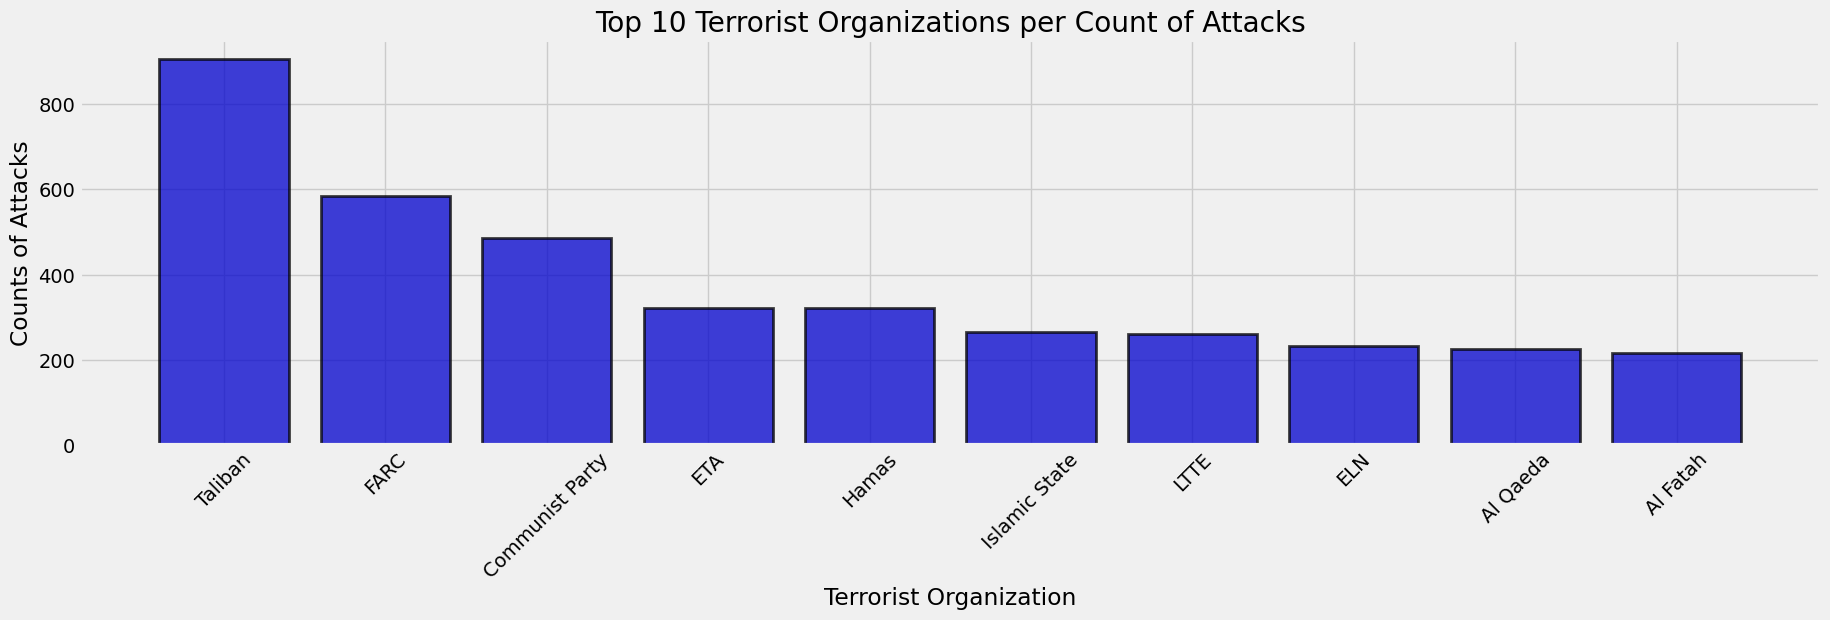

In [ ]:
plt.figure(figsize =(20,5))
plt.bar( attacker_top_org['attacker_abv'], attacker_top_org['count_per_attackers'], color = 'mediumblue', alpha = .75,  ec = 'black', linewidth = 2)
plt.title('Top 10 Terrorist Organizations per Count of Attacks')
plt.xlabel('Terrorist Organization')
plt.ylabel('Counts of Attacks')
plt.xticks(rotation = 45);

Upon analyzing the dataset, we observe that certain organizations have recorded over 200 attacks throughout the 50-year period covered. Specifically, the Taliban stands out with over 800 attacks, significantly more than the other groups. To determine if there is a trend regarding the occurrence of these groups, we need to examine their timelines.

By analyzing the data, we can identify whether certain groups have emerged more recently or have a longer history. This analysis will help us understand if the prevalence of these groups has been consistent over time or if there are temporal patterns. Please note that additional exploration of the dataset is required to provide a more detailed answer to this question.

#### What has these Terrorist organizations impacts been throught the years? Do they spike in one year or have they been consistent in attacks?

In [ ]:
attacker_based_on_year_all_top_10 = []
for attacker in attacker_top_org['attacker']:
    sql_statement = """
                   SELECT attacker, count(attacker) AS count_per_attackers, year
                   FROM global_terrorism
                   WHERE attacker = '""" + attacker + """'
                   GROUP BY year
                   """          
    current_attacker_df = pd.read_sql_query(sql_statement, conn)
    attacker_based_on_year_all_top_10.append(current_attacker_df)
attacker_based_on_year_all_top_10;

#### Now lets visualize these terroist organizations to see the impact of these groups!

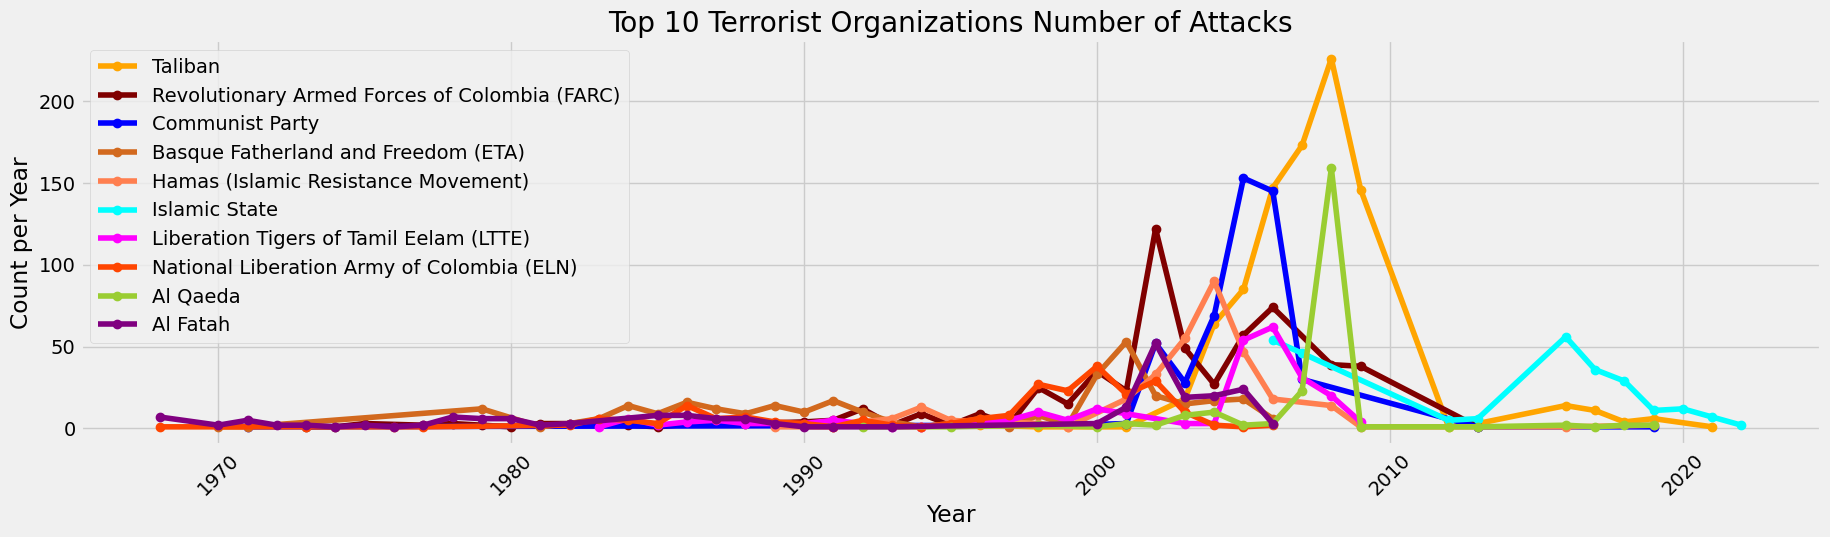

In [ ]:
plt.figure(figsize =(20,5))
colors = ['orange','maroon','blue','chocolate','coral','cyan','magenta','orangered','yellowgreen','purple','darkslategrey','plum']
n = 0
for attacker_per_year_df in attacker_based_on_year_all_top_10:
    current_attacker = attacker_per_year_df['attacker'].iloc[0]
    plt.plot(attacker_per_year_df['year'],attacker_per_year_df['count_per_attackers'], marker = 'o', label = current_attacker, color = colors[n])
    n= n+1
plt.xlabel('Year')
plt.title('Top 10 Terrorist Organizations Number of Attacks')
plt.ylabel('Count per Year')
plt.xticks(rotation=45)
plt.legend();

Indeed, based on the data analysis, it seems that there is a newer trend for the top terrorist organizations to engage in more frequent attacks in recent times. While some organizations may have existed prior to this period, their intensity of attacks has increased significantly in comparison. This observation suggests a shift in their operational strategies or an escalation of their activities.

On a positive note, the data also indicates a decline in the number of terrorist organizations after around 2010, which could be seen as an indication of the effectiveness of counter-terrorism efforts in the "war on terror."

To further explore the common trend in attack types among terrorist groups, we can analyze the frequency of each attack type. By examining the distribution of attack types over time, we can identify if there are preferred or prevalent attack methods among these groups. This analysis will help in understanding their tactics and potentially identifying patterns or similarities in their approaches.

### Q2:  How many people have been impacted due to terrorist attacks Based on the Attack Type?

We want to see if there is a relationship between the type of attack and the number of people impacted. This can be beneficial to know so that if news breaks out about a certain type of attack, the authorities have an estimate of how many people may have been impacted. Beyond this, it can help us see if a certain type of attack occurred more frequently and if we can project the occurrence of these attacks to potential times and frequencies, preparing for insider information on an unknown attack in a certain area and determining what to bring to the site of the attack

In [ ]:
#Write a sql statement to generate a table containing the category and a sum of the injured and dead
sql_statement_type = """ 
                      SELECT category, SUM(injured+dead) AS inj_dea
                      FROM global_terrorism
                      WHERE category IS NOT NULL
                      GROUP BY category
                      ORDER BY inj_dea DESC
                      LIMIT 8 
                       """

type_attack = pd.read_sql_query(sql_statement_type, conn)
type_attack;


In the table above, we summed the number of people who were injured and the number of people who are dead to obtain the total impacted by the attacks. We limited the returned rows to 8, excluding outlier categories with values ranging from 1 to 12 for inj_dea. The purpose of this is to focus on major occurrences and gain a more accurate understanding of the indicated data. Now, let's create a tree plot to visualize the data more effectively!

#### Create a treeplot to display the individuals impacted by the category of the attack.

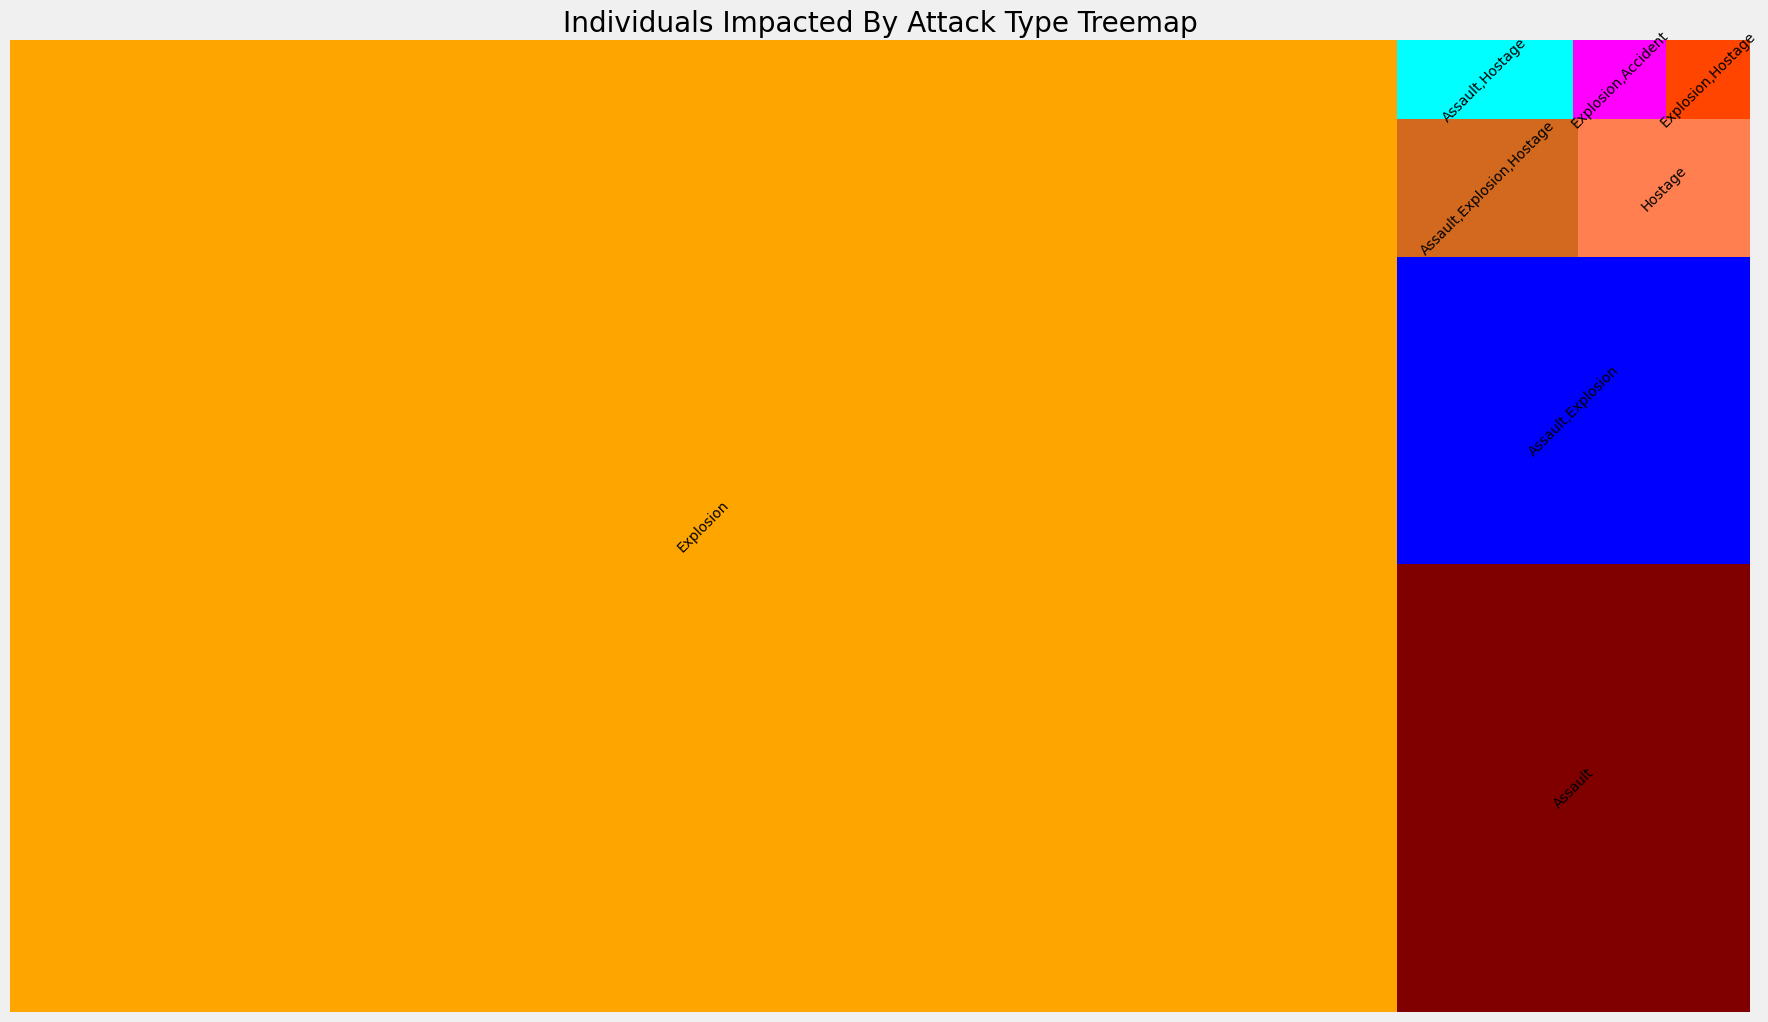

In [ ]:
#Write a python statement to create a treeplot of the table above
plt.figure(figsize=(20, 12))
tree_attacks = type_attack.sort_values('inj_dea', ascending=False)
colors = ['orange','maroon','blue','chocolate','coral','cyan','magenta','orangered','yellowgreen','purple','darkslategrey','plum']
sq.plot(sizes=tree_attacks['inj_dea'], label=tree_attacks['category'], color=colors, text_kwargs={'fontsize': 10 , 'rotation':45})
plt.title("Individuals Impacted By Attack Type Treemap")
plt.axis('off')
plt.show();

We can learn from the tree plot that the explosion category has impacted individuals the most. It is the largest category, occupying over 50% of the graph. It is followed by the assault category. The two smallest categories are the explosion-assault category and the explosion-hostage category, which are similar in size. After examining the number of people affected in each category, we are prompted to inquire about the frequency and scale of these attacks.

### Q3:  How frequent are there smaller attacks in comparison to our larger attacks?

We aim to determine the frequency of smaller attacks relative to larger attacks. By understanding this ratio, authorities can enhance their preparedness for both smaller and larger attacks. This knowledge enables them to develop comprehensive strategies to effectively respond to and mitigate the impact of attacks of varying scales.

#### What is the sum of the number of people injured and the number of people dead?

In [ ]:
# Code cells for next SQL comment /visualization, with comments as explained above.
sql_statement_impacted = """
                    SELECT injured AS inj,
                        dead AS dea, dead + injured AS sum_injured_dead
                    FROM global_terrorism
                    WHERE inj > 100 OR dea > 100
                    ORDER BY inj DESC
                   
                """

num_impact_no0 = pd.read_sql_query(sql_statement_impacted, conn)
num_impact_no0.head(50);

#### What is the average number of people impacted by the attacks?

In [ ]:
#Write a sql statement that will generate the average number of people impacted by the attacks
sql_statement_impacted = """
                    SELECT avg(dead + injured) AS avg_sum_injured_dead
                    FROM global_terrorism
                    
                """

avg_num_impact = pd.read_sql_query(sql_statement_impacted, conn)
avg_num_impact;

We learned that the average number of people impacted by the attacks is 9.324388. We will round it to 10 because it does not make sense to have .32 of a person affected.

#### Now let's graph a histogram to get a better look of the distribution!

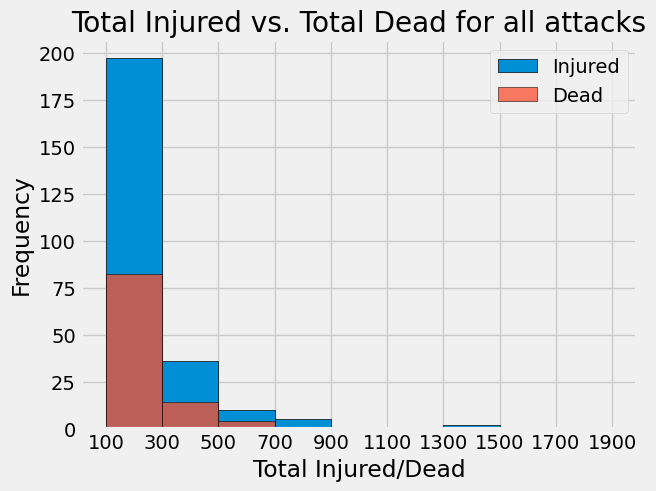

In [ ]:
#Create a histogram using python
plt.hist(num_impact_no0["inj"], edgecolor = 'black', bins = np.arange(100, 2000, 200), zorder=1, label='Injured')
plt.hist(num_impact_no0["dea"], edgecolor = 'black', bins = np.arange(100, 2000, 200), zorder=2, alpha = .75, label='Dead')
plt.xticks(np.arange(100,2000, 200))
plt.xlabel('Total Injured/Dead')
plt.ylabel('Frequency')
plt.title('Total Injured vs. Total Dead for all attacks')
plt.legend();

The histogram above displays the number of people injured or killed per attack. We observe that there was one attack falling into the 1300-1500 bin, indicating a larger-scale incident. Additionally, we notice a high frequency in the 100-300 bin, suggesting a significant number of attacks with a moderate impact. To gain a deeper understanding of the data, let's group the data into size categories.

#### Now let's sort the values into categories!

Here, we are going to split the data into different categories based on the total attack size. We observe a significant number of smaller attack sizes, so we will focus on breaking down the starting bin size rather than the larger bin size. The classifications are as follows:

*   XS ==> 0 - 25
*   S  ==> 25 - 50
*   M  ==> 50 - 75
*   L  ==> 75 - 150
*   XL ==> 150+

In this we can see the number of attacks at the different levels.



In [ ]:
#Write a sql statement that categorizes the number of attacks into categories
sql_statement_inj_deac = """ SELECT CASE 
                                    WHEN injured+dead > 0 AND injured < 25 THEN 'XS'
                                    WHEN injured+dead < 50 THEN 'S'
                                    WHEN injured+dead < 75 THEN 'M'
                                    WHEN injured+dead < 150 THEN 'L'
                                    ELSE 'XL'
                                    END 'inj_dea',
                                        COUNT(*) AS num_dead_or_injured
                            FROM global_terrorism
                            GROUP BY inj_dea
                            ORDER BY num_dead_or_injured DESC
                                        """
inj_dea_count = pd.read_sql_query(sql_statement_inj_deac, conn)
inj_dea_count;

#### Let's find out the average and median of the table above!

In [ ]:
#Calculate the mean
inj_dea_avg = inj_dea_count["num_dead_or_injured"].mean()
inj_dea_avg

5434.0

In [ ]:
#Calculate the Median
inj_dea_median = np.median(inj_dea_count["num_dead_or_injured"])
inj_dea_median

324.0

We observe a significant disparity between these measures, indicating a substantial gap. These contrasting numbers highlight the significant impact that large outliers had on the data.

#### Graph the table above in a bar chart

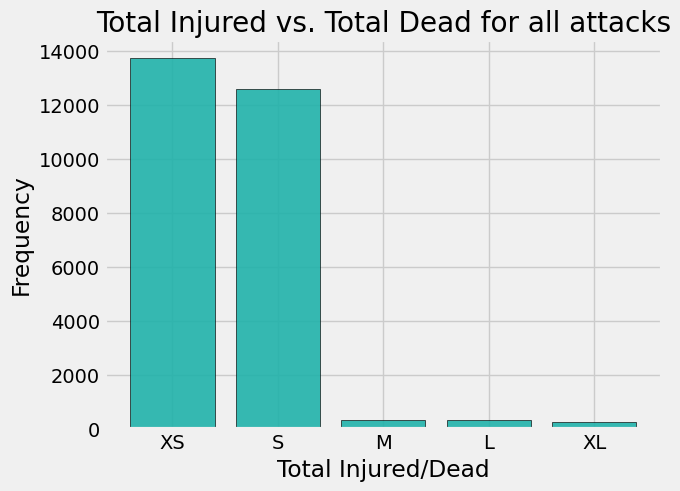

In [ ]:
#Write bar code here
plt.bar(inj_dea_count["inj_dea"], inj_dea_count["num_dead_or_injured"], color = 'lightseagreen', edgecolor='Black', zorder=1, alpha = .9)
plt.xlabel('Total Injured/Dead')
plt.ylabel('Frequency')
plt.title('Total Injured vs. Total Dead for all attacks');

In the table above, we discover that the majority of the total injured/dead individuals fall into the XS and S categories. This observation leads us to believe that smaller attacks occur more frequently compared to larger attacks, as evidenced by the significant gap between the XS/S categories and the M, L, and XL categories. Having examined the number of people affected by these attacks, our next inquiry is to identify the countries that have been impacted by these attacks.

### Q4:  What is the distribution of the countries that have had terrorist attacks?

We want to determine the frequency of attacks in each country to assess potential associations between them. Understanding this information can provide insights into countries that are more likely to be targeted again. Upon performing calculations, we discovered that Iraq was attacked approximately 4,235 times. Consequently, we created a graph excluding Iraq to obtain a clearer view of the distribution. Below are our calculations and graphs.

In the original dataset, there is a country that has been attacked over 4,000 times. However, this country is not included in the graph above as it is a significant outlier. Let's determine the name of this country.

####  What is the name of the country that has been attacked more than 4000  times?

In [ ]:
#Write a sql statement to determine which country has been attacked over 4000 times
sql_statement = """SELECT country, COUNT(*) As attacks_per_country
                   FROM global_terrorism
                   GROUP BY country
                   HAVING attacks_per_country > 4000
                   ORDER BY attacks_per_country"""

country_attacked_about_4000_times = pd.read_sql_query(sql_statement, conn)
country_attacked_about_4000_times

,country,attacks_per_country
0,Iraq,4235


The code snippet above reveals the presence of an outlier in our dataset. We identify Iraq as the country with the highest number of attacks, reaching a significant count of 4,235 incidents. Now, let's proceed to explore the frequency of attacks for each country in our analysis.

#### Let's look at how many times each county has been attacked.

In [ ]:
#Write a sql statement to generate a table to display how many times a country has been attacked 
sql_statement = """SELECT country, COUNT(*) As attacks_per_country
                   FROM global_terrorism
                   GROUP BY country
                   ORDER BY attacks_per_country"""

attacks_per_country = pd.read_sql_query(sql_statement, conn)
attacks_per_country

,country,attacks_per_country
0,Azores,1
1,Belize,1
2,Benin,1
3,Central African Republic,1
4,Dagestan,1
...,...,...
170,Israel,1214
171,India,1487
172,Colombia,1522
173,Afghanistan,1678


The table above provides a comprehensive list of countries in the dataset, along with the corresponding total number of attacks each country has experienced. Notably, Iraq stands out with the highest number of attacks, while several countries have been targeted only once. This tabular information will be instrumental in constructing our histogram graph.

#### Create a histogram to display the distribution of the total number of attacks of Countries.

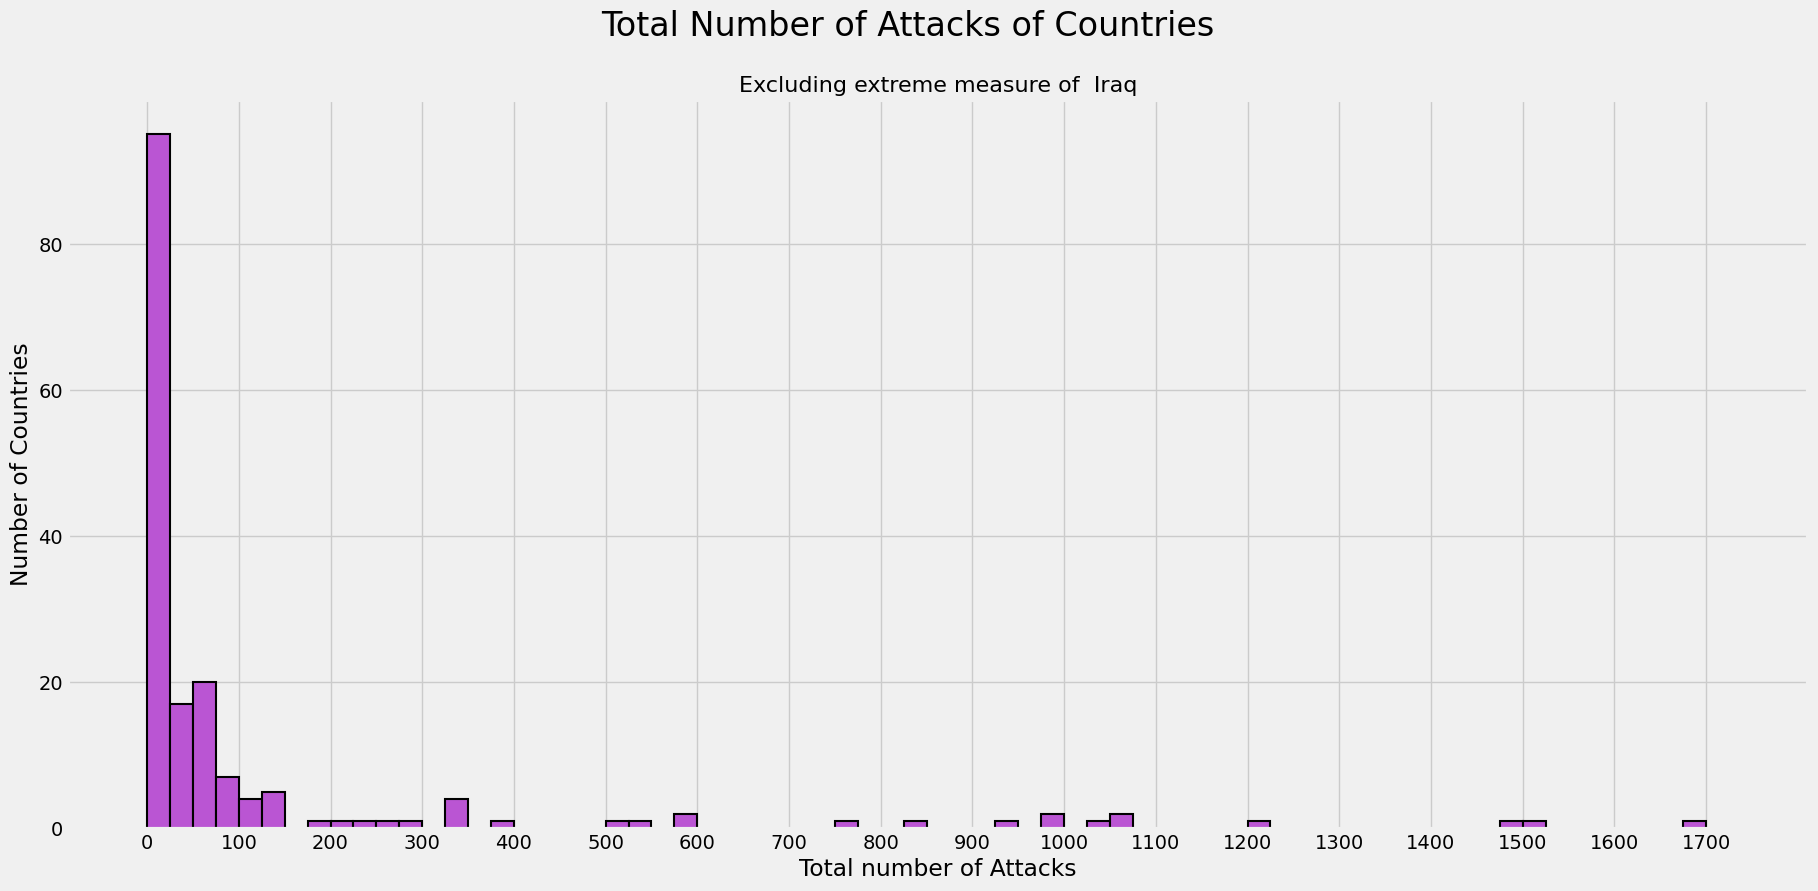

In [ ]:
#Write a python statement to generate a histogram that displays the total number attacks of Countries
special_bins=np.arange(1, 1750, 200)
special_bins=np.insert(special_bins, 1,1)

plt.figure(figsize =(20,9))
plt.hist(attacks_per_country["attacks_per_country"], edgecolor = 'black', bins = np.arange(0, 1750, 25), zorder=1,color = 'mediumorchid', linewidth=1.5)
plt.xlabel('Total number of Attacks')
plt.xticks(np.arange(0, 1750, 100))
plt.ylabel('Number of Countries')
plt.title('Excluding extreme measure of  Iraq',size = 16)
plt.suptitle('Total Number of Attacks of Countries',size = 24);

In the histogram above, there is a wide distribution in the number of attacks. Many of the countries fall within the 0-25 total number of attacks bin. Upon examining the SQL statement in the table above, it is apparent that many countries have been attacked only once. This explains why the first bin is the tallest.

Now that we have assessed the number of countries that have experienced attacks, let's determine the names of the countries that have not encountered any terrorist attacks.

#### Now let's look at the countries that have had no terrorist attacks

In [ ]:
#Write a sql statement to generate a list of countires that have not had a terrorist attack
sql_statement = """ 
                  SELECT  country
                  FROM global_terrorism

                  EXCEPT 

                  SELECT country
                  FROM population
                  
                """
countries_with_no_attacks = pd.read_sql_query(sql_statement, conn)
countries_with_no_attacks

,country
0,Azores
1,Bahamas
2,Bosnia & Herzegovina
3,Chechen Republic
4,Congo
5,Cote D'Ivoire (Ivory Coast)
6,Czech Republic
7,Dagestan
8,Democratic Republic of the Congo
9,East Timor


The code above displays the names of the countries that have not experienced a terrorist attack. We discover that there are 21 countries in total that have remained unharmed. However, considering the geographical locations of some of these countries, it may be difficult to believe that they have not been targeted. Given our lack of knowledge regarding the data collection methodology, we cannot definitively confirm the accuracy of these reported results.

Having examined the frequency of attacks in each country, our next query pertains to the number of times an attack or multiple attacks have significantly impacted a particular country.

### Q5: How many times has there been an attack that took a significant portion of the home country population?

We would like to determine the number of large-scale terrorist attacks based on their occurrence in different countries. It's important to consider that each country has a unique threshold for what constitutes a large-scale attack. While all terrorist acts are inherently bad, the impact of an attack can vary based on the population size of the country. For instance, a 1% loss of population due to a singular terrorist attack would be a significant event, although the specific percentage may differ for each country.

It's worth noting that the population data we have is sourced from the 2023 Census data, which may not necessarily align with the exact year when the terrorist attacks occurred.

#### Now lets look at only attacks that take out a "significant" percentage of the population

The term "significant" in our analysis is defined as .0005% of the country's total population. This threshold can result in a large number depending on the size of the country's population, or it can be in single digits for smaller countries. It is important to address any null values in our dataset and assign the appropriate subregion based on the country's location.

In [ ]:
sql_statement = """SELECT COUNT(*) AS count,
                      CASE 
                      WHEN t.subreg NOT NULL 
                        THEN t.subreg
                      WHEN t.country = 'Barbados'
                        THEN 'Caribbean'
                      WHEN t.country = 'Ireland'
                        THEN 'Northern Europe'
                      WHEN t.country = 'Peru'
                        THEN 'South America'
                      WHEN t.country = 'Libya'
                        THEN 'Northern Africa'
                      WHEN t.country = 'Iraq'
                        THEN 'Western Asia'
                      WHEN t.country = 'Syria'
                        THEN 'Western Asia'
                      WHEN t.country = 'Israel'
                        THEN 'Western Asia'
                      WHEN t.country = 'Saudi Arabia'
                        THEN 'Western Asia'
                      WHEN t.country = 'Lebanon'
                        THEN 'Western Asia'
                      WHEN t.country = 'Cyprus'
                        THEN 'Southern Europe'
                      WHEN t.country = 'Lebanon'
                        THEN 'Western Asia'
                      WHEN t.country = 'United Arab Emirates'
                        THEN 'Western Asia'
                      WHEN t.country = 'Sri Lanka'
                        THEN 'Southern Asia'
                      WHEN t.country = 'Greece'
                        THEN 'Southern Europe'
                      WHEN t.country = 'Egypt'
                        THEN 'Northern Africa'
                      WHEN t.country = 'Algeria'
                        THEN 'Northern Africa'
                      WHEN t.country = 'Niger'
                        THEN 'Western Africa'
                      WHEN t.country = 'Chad'
                        THEN 'Middle Africa'
                      WHEN t.country = 'Georgia'
                        THEN 'Western Asia'
                      WHEN t.country = 'Kuwait'
                        THEN 'Western Africa'
                      WHEN t.country = 'Kosovo'
                        THEN 'Eastern Europe'
                      WHEN t.country = 'Guatemala'
                        THEN 'South America'
                      WHEN t.country = 'El Salvador'
                        THEN 'Central America'
                      WHEN t.country = 'Switzerland'
                        THEN 'Western Europe'
                      WHEN t.country = 'Somalia'
                        THEN 'Eastern Africa'
                      WHEN t.country = 'Kyrgyzstan'
                        THEN 'Central Asia'
                      WHEN t.country = 'Cambodia'
                        THEN 'South-Eastern Asia'
                      WHEN t.country = 'Serbia'
                        THEN 'Southern Europe'
                      WHEN t.country = 'Thailand'
                        THEN 'South-Eastern Asia'
                      WHEN t.country = 'Nicaragua'
                        THEN 'Central America'
                      WHEN t.country = 'Namibia'
                        THEN 'Southern Africa'
                      WHEN t.country = 'Djibouti'
                        THEN 'Eastern Africa'
                      WHEN t.country = 'Mauritania'
                        THEN 'Western Africa'
                      WHEN t.subreg IS NULL
                        THEN t.country
                      END subregplus

                   FROM global_terrorism AS t
                    JOIN population AS p
                    on p.Country = t.country
                  WHERE ((t.injured + t.dead) / p.Population)	* 100.0 >= .0005
                  GROUP BY subregplus
                  ORDER BY COUNT 
                  
                """
is_this_why = pd.read_sql_query(sql_statement, conn)
is_this_why

,count,subregplus
0,1,Australia and New Zealand
1,1,Eastern Asia
2,1,Melanesia
3,2,Caribbean
4,2,Northern America
5,2,Southern Africa
6,3,Middle Africa
7,3,South-Eastern Asia
8,5,Central America
9,6,Western Europe


#### Now lets visulize the number of terrorist attacks based on subregion!

C:\Users\alexa\AppData\Local\Temp\ipykernel_20136\4171595626.py:2: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('cool')


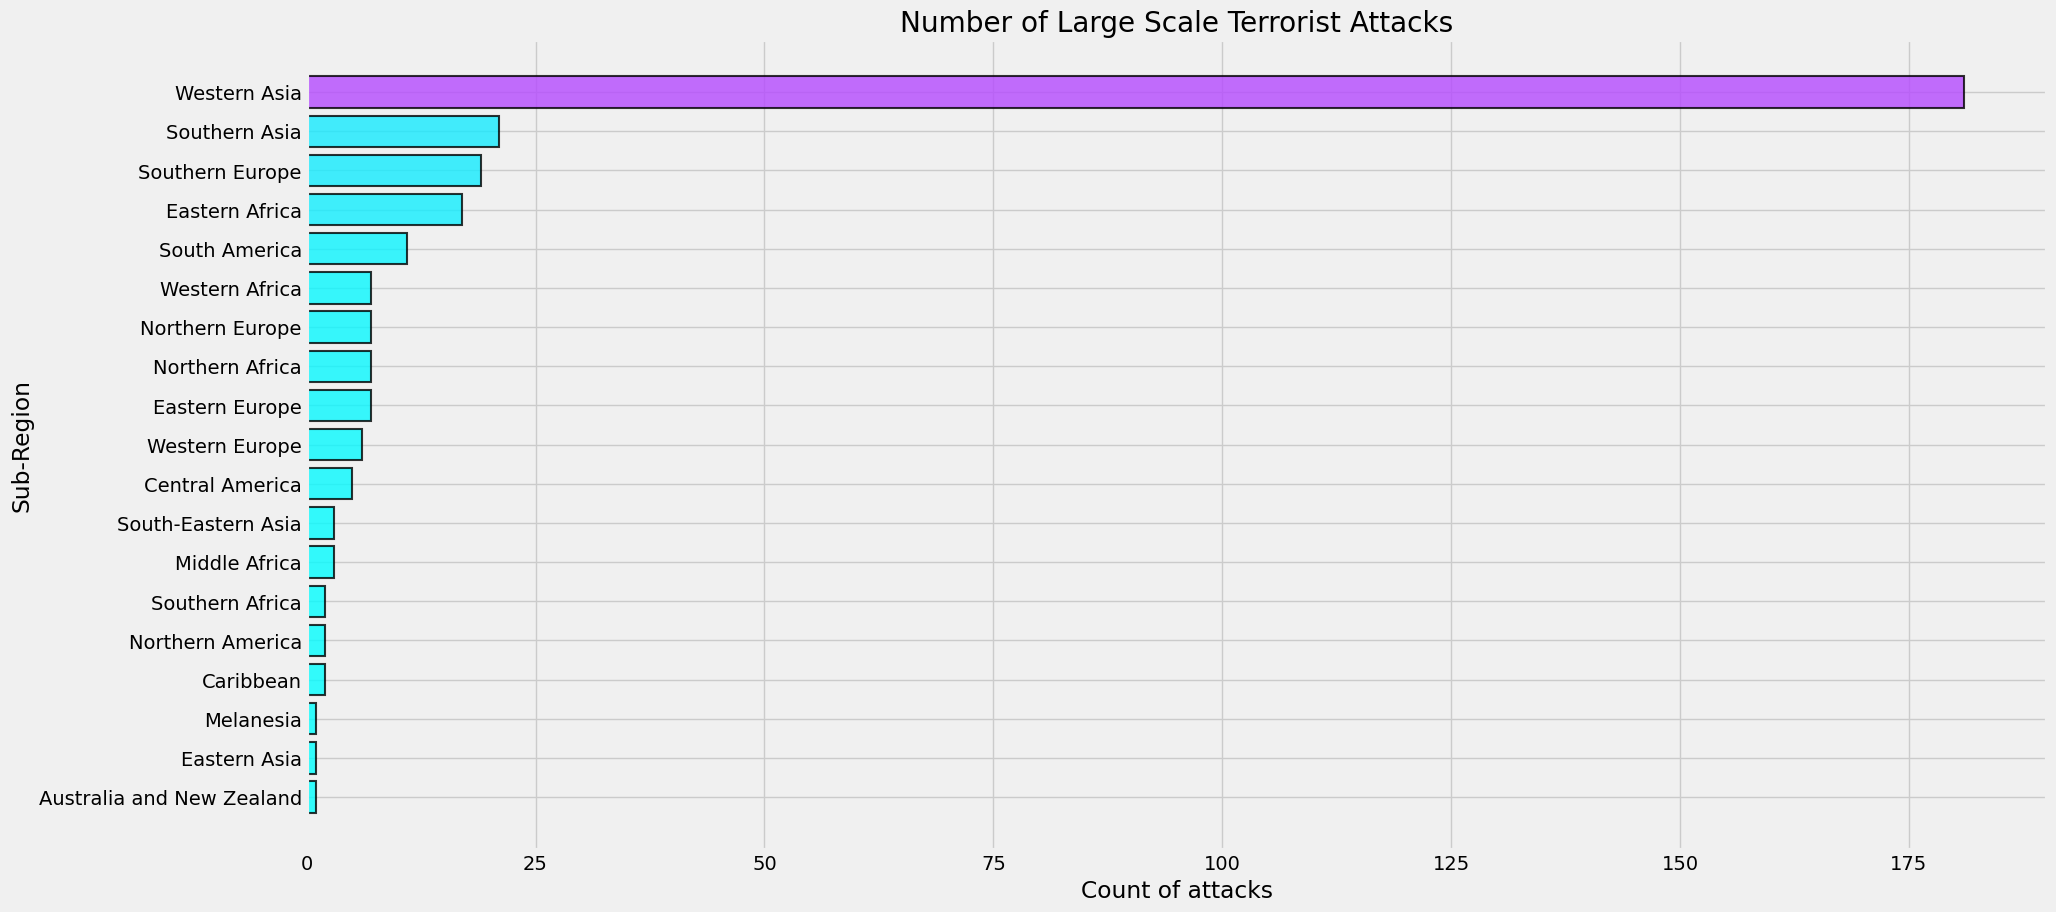

In [ ]:
## Couldn't take out the output here due to this being taken out in Python 3.7. This is just a reminder it will be taken out.
plt.figure(figsize =(20,10))
cmap = cm.get_cmap('cool')
plt.barh(is_this_why['subregplus'],is_this_why['count'],color = cmap(is_this_why['count']),edgecolor = 'black', linewidth=1.5 , alpha = .8)
plt.title('Number of Large Scale Terrorist Attacks')
plt.xlabel('Count of attacks')
plt.ylabel('Sub-Region');

We observe that most continents have recorded a relatively low number of attacks that accounted for .0005% of the total population in 2023. However, we note an exceptional case where over 175 attacks occurred between the 1970s and the 2020s, which is unprecedented compared to the rest of the subregions where the number of attacks did not exceed 25. This discrepancy could be attributed to a combination of the number of attacks in the region and the population size. Although this measure may not be perfect, it highlights the impact of terrorism on these subregions and underscores the need for proactive measures.

If we were rulers or policymakers in Western Asia, it would be crucial to reassess how we create laws, govern our people, and address various types of terrorist attacks to minimize their impact. In terms of preventative steps, the countries in Western Asia would benefit from emphasizing certain aspects of education to their people. These may include promoting tolerance, understanding, and respect for diverse cultures and beliefs, fostering social cohesion, and empowering individuals to identify and report potential threats or radicalization. By focusing on these areas, countries can strengthen their preventive strategies against terrorism.

### Q6: Does the Type of attack have any impact on Casualties(death/injured)? Does the Type of attack become more deadly overtime?

We aim to examine the average attacks to determine if there is a specific type of attack that tends to result in more significant impacts in the context of terrorism. This analysis can assist in predicting potential attack patterns and estimating casualty counts. Understanding whether the type of attack has become more lethal over time is crucial in shaping our perception of these attacks. It helps us assess if there are advancements or innovations in the methods employed by terrorists. Furthermore, it guides us in exploring alternative preventive measures to mitigate the impact of such attacks.

#### What are the different types of attacks used in this dataset?

In [ ]:
distinct_category = """ 
                  SELECT DISTINCT(category)
                  FROM global_terrorism
                  WHERE category NOT NULL;

                """
distinct_category = pd.read_sql_query(distinct_category, conn)
distinct_category;

#### Based on the attack type in the dataset, we can dive into the dataset to get averages on deaths and injuries based on the attack type per year.

In [ ]:
# Code cells for next SQL comment /visualization, with comments as explained above.
category_of_attacks = []
for category in distinct_category['category']:
    sql_statement = """ 
                  SELECT  category, AVG(dead) AS avg_dead, year, AVG(injured) AS avg_injured
                  FROM global_terrorism
                  WHERE category = '"""+category+"""'
                  GROUP BY year;
                """
    avg_attack_deaths_df = pd.read_sql_query(sql_statement, conn)
    category_of_attacks.append(avg_attack_deaths_df)
category_of_attacks;

#### Graph the data to explore average deaths based on the year.

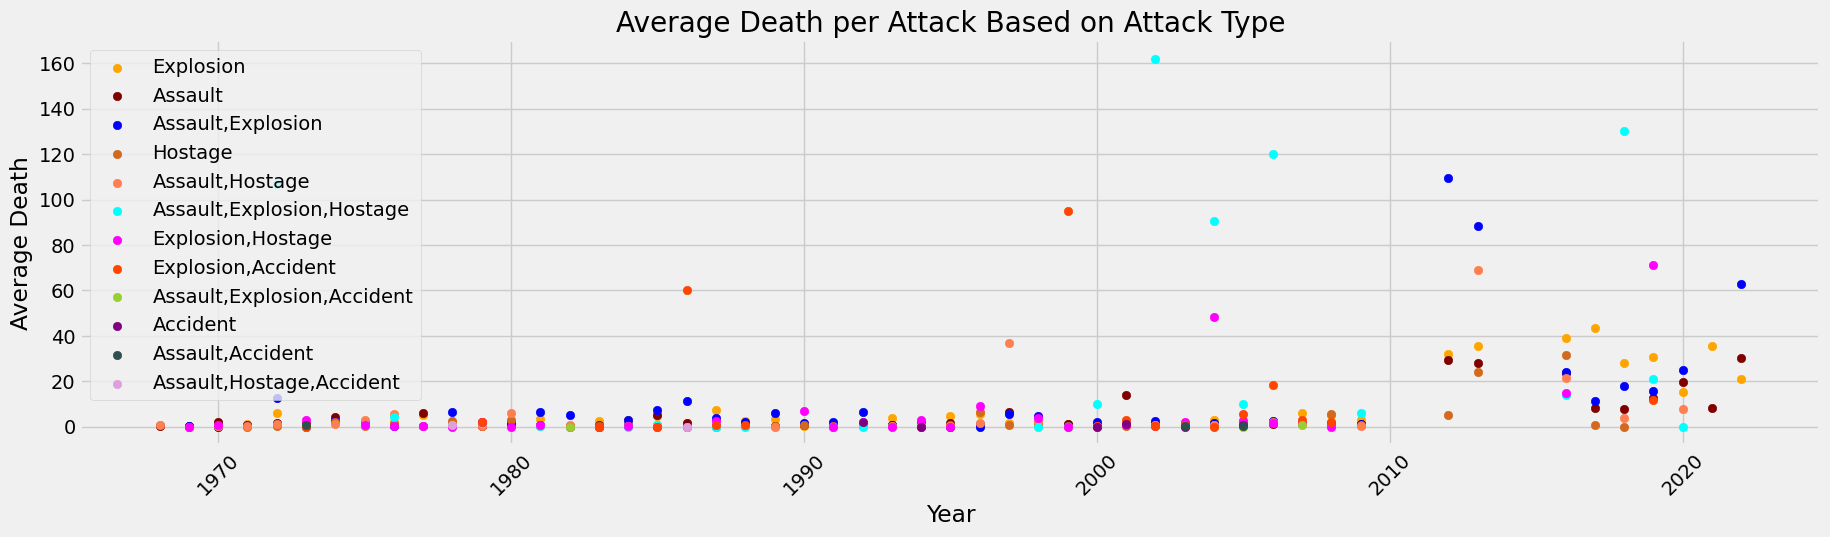

In [ ]:
plt.figure(figsize =(20,5))
colors = ['orange','maroon','blue','chocolate','coral','cyan','magenta','orangered','yellowgreen','purple','darkslategrey','plum']
n = 0
for avg_attack_deaths_df in category_of_attacks:
    attack_type = avg_attack_deaths_df['category'].iloc[0]
    plt.scatter(avg_attack_deaths_df['year'],avg_attack_deaths_df['avg_dead'], marker = 'o', label = attack_type, color = colors[n])
    n= n+1
plt.title('Average Death per Attack Based on Attack Type')
plt.xlabel('Year')
plt.ylabel('Average Death')
plt.xticks(rotation=45)
plt.legend();

We observe that over time, there was a significant increase in the impact of Explosion and Accident attacks, particularly during the period from around 1985 to before 2000. Subsequently, there was a noticeable surge in various types of attacks after 2010. This timeframe coincides with the initiation of the War on Terror, a policy implemented by the United States that aimed to combat terrorism and target high-ranking leaders of terrorist organizations.

#### Now lets look into the data comparing average deaths per year based on the average injuries per year.

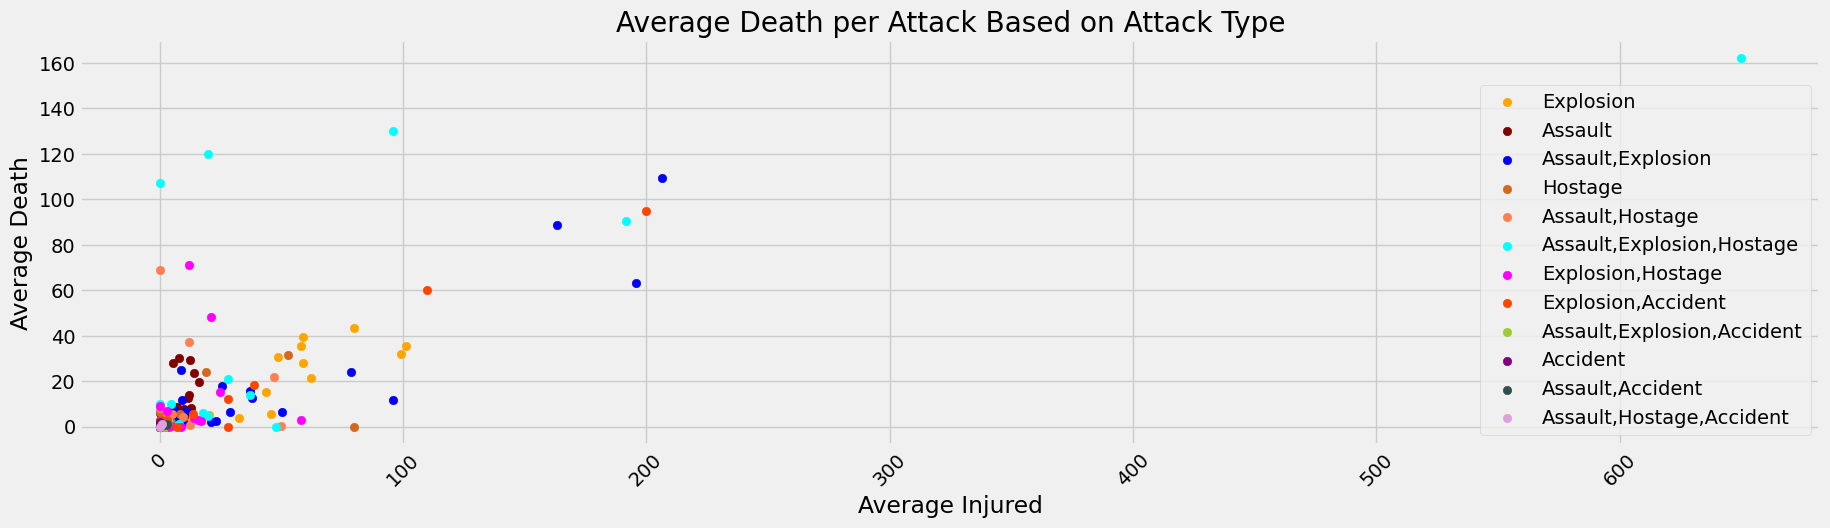

In [ ]:
plt.figure(figsize =(20,5))
colors = ['orange','maroon','blue','chocolate','coral','cyan','magenta','orangered','yellowgreen','purple','darkslategrey','plum']
n = 0
for avg_attack_deaths_df in category_of_attacks:
    attack_type = avg_attack_deaths_df['category'].iloc[0]
    plt.scatter(avg_attack_deaths_df['avg_injured'],avg_attack_deaths_df['avg_dead'], marker = 'o', label = attack_type, color = colors[n])
    n= n+1
plt.title('Average Death per Attack Based on Attack Type')
plt.xlabel('Average Injured')
plt.ylabel('Average Death')
plt.xticks(rotation=45)
plt.legend();

We observe that the majority of extreme outliers, characterized by higher average death counts and lower average injury counts, are associated with explosion attacks. This highlights the importance of educating and preparing individuals living in areas that are prone to such terrorist attacks. By understanding the nature of these attacks and learning survival strategies, people can take preventive measures to enhance their safety, especially in situations where it may be challenging to neutralize terrorist groups efficiently.

We can observe several outliers in this plot. Let's explore the furthest outlier, where the average number of injured individuals is at 600, to understand the reasons behind such a high value.

#### Lets take a deeper dive to our extreme outliers

In [ ]:
sql_statement = """ 
                  SELECT  category, AVG(dead) AS avg_dead, year, AVG(injured) AS avg_injured
                  FROM global_terrorism
                  WHERE category = 'Assault,Explosion,Hostage'
                  GROUP BY year
                  ORDER BY avg_injured DESC
                  LIMIT 1;
                """
outlier = pd.read_sql_query(sql_statement, conn)
outlier;

In [ ]:
sql_statement = """ 
                  SELECT  *
                  FROM global_terrorism
                  WHERE category = 'Assault,Explosion,Hostage'
                      AND year = '2002'
                """
outlier = pd.read_sql_query(sql_statement, conn)
outlier

,month,day,year,agg_date,country,state,city,subreg,continent,attacker,injured,dead,cause,lat,long,category
0,10,24,2002,10/24/2002,Russia,Moscow,Moscow,Eastern Europe,Europe,Movsar Barayev Gang,650.0,162.0,Approximately 45 Chechen terrorists stormed in...,55.750446,37.617494,"Assault,Explosion,Hostage"


It seems that there was a significant terrorist attack in Moscow categorized as Assault, Explosion, Hostage. This single event can heavily influence our data, as there was only one occurrence in that particular year. To ensure more reliable analysis, we should focus on attack types that have at least five or more incidents in a given year, rather than relying on just one attack of a specific type.

#### Lets now fix our code to take a look at only years that had more then 5 attacks to give better average numbers

In [ ]:
# Code cells for next SQL comment /visualization, with comments as explained above.
category_of_attacks2 = []
for category in distinct_category['category']:
    sql_statement = """ 
                  SELECT  category, AVG(dead) AS avg_dead, year, AVG(injured) AS avg_injured
                  FROM global_terrorism
                  WHERE category = '"""+category+"""'
                  GROUP BY year
                  HAVING COUNT(*) >= 5;
                """
    avg_attack_deaths_df = pd.read_sql_query(sql_statement, conn)
    category_of_attacks2.append(avg_attack_deaths_df)
category_of_attacks2;

#### Now lets look at what the changes has done to our graphs now that we have filtered out some years!

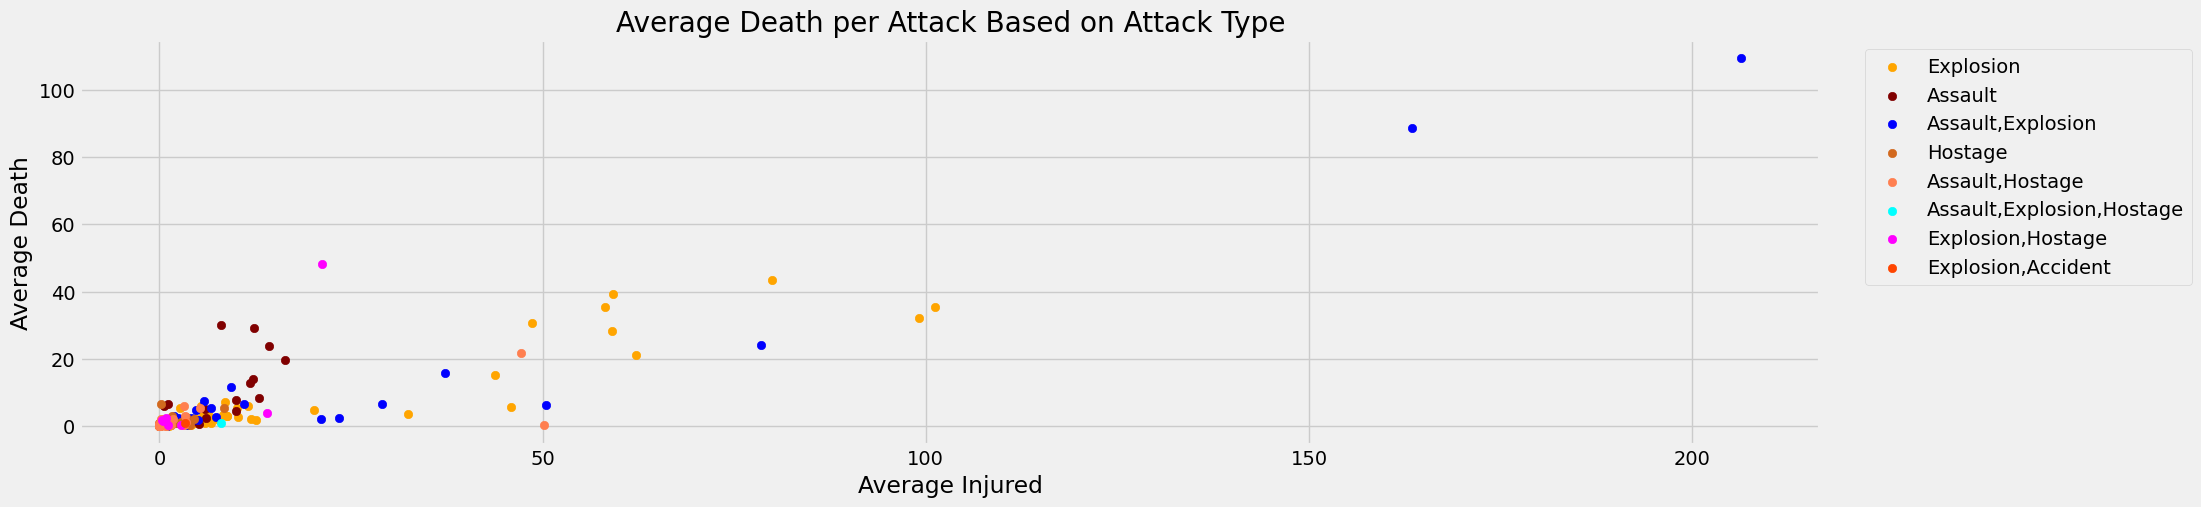

In [ ]:
plt.figure(figsize =(20,5))
colors = ['orange','maroon','blue','chocolate','coral','cyan','magenta','orangered','yellowgreen','purple','darkslategrey','plum']
n = 0
for avg_attack_deaths_df in category_of_attacks2:
  if avg_attack_deaths_df.empty:
    break
  else:
    attack_type = avg_attack_deaths_df['category'].iloc[0]
    plt.scatter(avg_attack_deaths_df['avg_injured'],avg_attack_deaths_df['avg_dead'], marker = 'o', label = attack_type, color = colors[n])
    n = n + 1
plt.title('Average Death per Attack Based on Attack Type')
plt.xlabel('Average Injured')
plt.ylabel('Average Death')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left');

We can observe that there are still a few years with high average attacks involving Assault and Explosion. This indicates that these types of attacks occur frequently and result in a higher number of injuries, potentially leading to severe incidents. Notably, explosion attacks now seem to have a more significant presence than initially perceived.

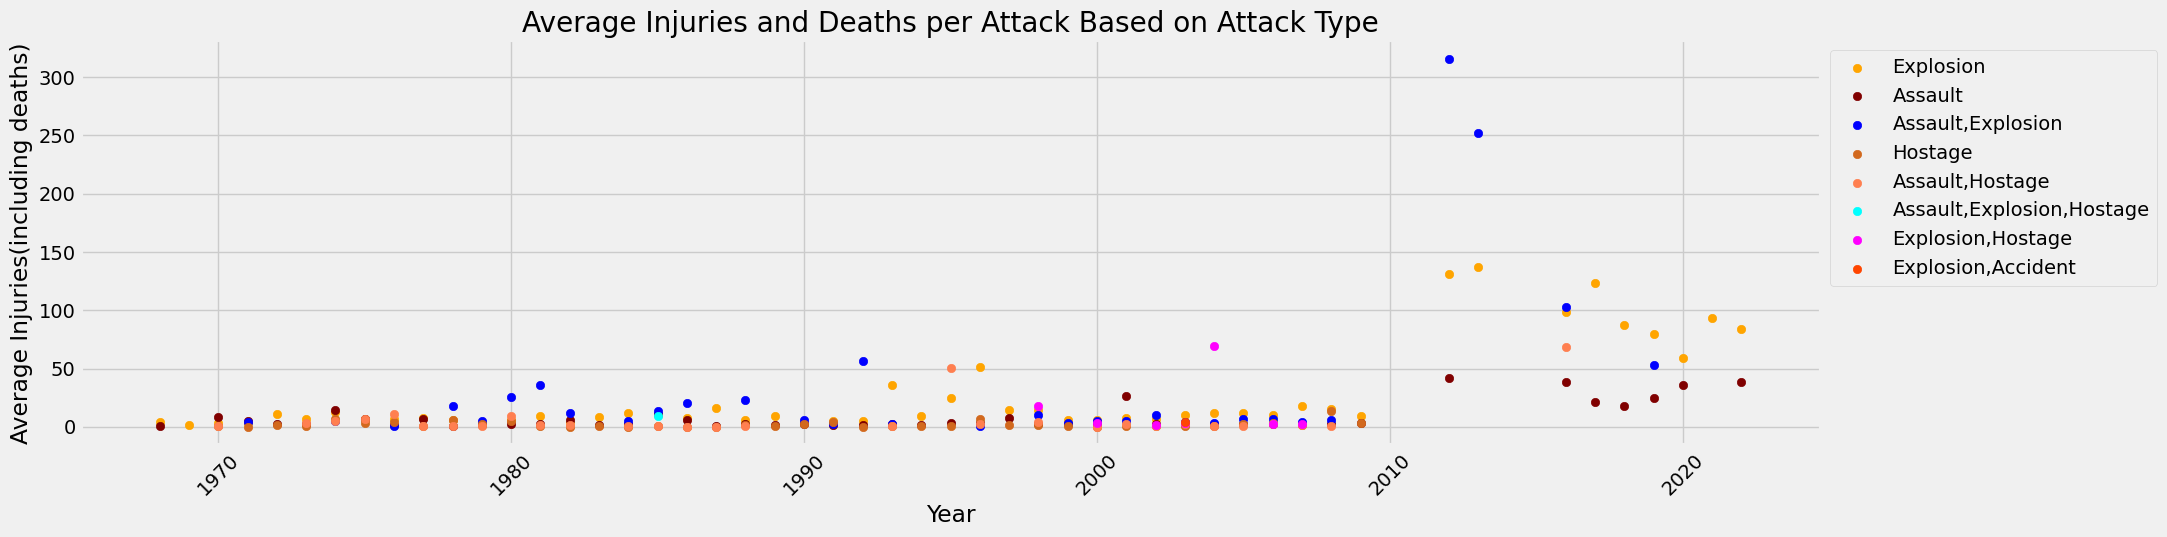

In [ ]:
plt.figure(figsize =(20,5))
colors = ['orange','maroon','blue','chocolate','coral','cyan','magenta','orangered','yellowgreen','purple','darkslategrey','plum']
n = 0
for avg_attack_deaths_df in category_of_attacks2:
  if avg_attack_deaths_df.empty:
    break
  else:
    attack_type = avg_attack_deaths_df['category'].iloc[0]
    plt.scatter(avg_attack_deaths_df['year'],avg_attack_deaths_df['avg_dead'] + avg_attack_deaths_df['avg_injured'], marker = 'o', label = attack_type, color = colors[n])
    n= n+1
plt.title('Average Injuries and Deaths per Attack Based on Attack Type')
plt.xlabel('Year')
plt.ylabel('Average Injuries(including deaths)')
plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1, 1), loc='upper left');

We can observe that over time, there is a decrease in the sharp increase of attacks after 2010 in all aspects. However, there are still a few years with higher attack numbers in the later period. As expected, Assault and Explosion type attacks consistently remain higher compared to other attack types in the dataset. Notably, Explosions appear to have a higher impact considering their frequency of occurrence.

---
## 4. Conclusion




We have gained valuable insights into global terrorism through our comprehensive data analysis. Our study has revealed intriguing facts about the patterns and dynamics of terrorist activities. Notably, we observed a significant increase in terrorist attacks globally after the tragic events of 9/11. It is striking to note that all of the top ten terrorist organizations in our dataset experienced a surge in attacks post-2001, despite their pre-existing presence. This phenomenon could be attributed to the intensified involvement of the United States in the Middle East following 9/11, prompting retaliatory actions from these organizations to assert their power and resistance.

Furthermore, our analysis uncovered a higher occurrence of smaller-scale attacks compared to larger-scale attacks. The prevalence of such smaller attacks suggests potential limitations in funding or challenges faced by these organizations in executing larger and more impactful operations. This finding sheds light on the resource constraints and difficulties faced by terrorist groups in carrying out large-scale attacks.

In conclusion, our findings underscore the significant threat posed by terrorist organizations worldwide. The post-9/11 period witnessed a notable upsurge in attacks, emphasizing the complex interplay between global events and terrorist activities. By understanding these patterns and dynamics, we can enhance our strategies to counter terrorism and safeguard global security.